<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">Visualización para la ciencia de datos</p>
    <p style="margin: 0; text-align:right;">Grado en Ciencia de Datos Aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

A9: Creación de la visualización y entrega del proyecto - PRAC2
============================

Desarrollo de una visualización de datos que demuestre su conocimiento del campo, así como el uso de diferentes herramientas y técnicas, basadas en el conjunto de datos seleccionado y validado en la primera parte de la práctica.

---


**Estudiante: Federico Clavijo Lòpez**

**Usuario: fclavijo0**


In [1]:
import pandas as pd
import csv
import re
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma

import warnings
warnings.filterwarnings('ignore')

# Pregunta central

Los datasets ofrece una buena oportunidad de comparar la diferencia en la calidad del aire en los años (2014 al 2019) tanto inferior a 10 y 2.5 micrómetros, identificar de forma visual la variación en la Concentración promedio de Material Particulado en los 12 puntos de medición que corresponde a diferentes localidades dentro de la ciudad del Bogotá.

Los datasets seleccionados corresponden a 14, estos son:

- 6 relacionados a Concentración de Material Particulado Inferior a 2.5 Micrómetros {PM2.5} Promedio Mensual por Estación desde los años 2014 - 2019 Fuente: Datos Abiertos Bogotá (bogota.gov.co)

- 6 relacionados a Concentración de Material Particulado Inferior a 10 Micrómetros {PM10} Promedio Mensual por Estación Fuente: Datos Abiertos Bogotá (bogota.gov.co)

- 1 relacionado a Encuesta Anual de Comercio - EAC – 2019 Fuente: Colombia - Encuesta Anual de Comercio - EAC - 2019 (dane.gov.co)

- 1 relacionado a Encuesta Anual de Industria - EAI – 2019 Fuente: Colombia - Encuesta Ambiental Industrial - EAI - 2019 (dane.gov.co)

Pregunta: **¿Existe una relación entre la calidad del aire en los niveles de Material Particulado (en los valores de PM2.5 y PM10) y el comportamiento económico de las localidades medidas en la ciudad de Bogotá Colombia?**

# Entendimiento de los datasets
 

**Dataset consolidado de medición de Material Particulado Inferior a 2.5 Micrómetros**

6 datasets en total relacionados a Concentración de Material Particulado Inferior a 2.5 Micrómetros {PM2.5} Promedio Mensual por Estación desde los años 2014 - 2019
Licencia específicada como: CC0 - Public Domain.
Link al dataset: https://datosabiertos.bogota.gov.co/dataset/concentracion-de-material-particulado-inferior-a-2-5-micrometros-pm2-5-promedio-rmcab


In [240]:
# Reconocimeinto de los datasets de Material Particulado Inferior a 2.5 Micrómetros {PM2.5} 
data25_2014 = pd.read_csv('25 2014.csv', sep = ';')
data25_2015 = pd.read_csv('25 2015.csv', sep = ';')
data25_2016 = pd.read_csv('25 2016.csv', sep = ';')
data25_2017 = pd.read_csv('25 2017.csv', sep = ';')
data25_2018 = pd.read_csv('25 2018.csv', encoding='latin1', sep = '\t')
data25_2019 = pd.read_csv('25 2019.csv', sep = ';')
data25_2019 = data25_2019.drop(['Fontibon - Font25\n(µg/m³)'], axis=1)
data25_2014.head()

,fecha,Kennedy - Ken,Carvajal - Carv,Centro de Alto rendimiento - CdAR,Usaquén - Usaq,Puente Aranda - Puen,San Cristóbal - SanC,Tunal - Tunal,Guaymaral - Gua,Las Ferias - LFer,MinAmbiente - MinA,Suba - Suba
0,2014-01,36.0,NaN,18.0,10.0,NaN,NaN,18,NaN,17.0,NaN,NaN
1,2014-02,41.0,48.0,29.0,17.0,NaN,NaN,28,NaN,28.0,NaN,NaN
2,2014-03,42.0,46.0,31.0,23.0,NaN,NaN,35,NaN,NaN,NaN,35.0
3,2014-04,32.0,29.0,20.0,13.0,NaN,NaN,23,NaN,20.0,14.0,24.0
4,2014-05,32.0,30.0,22.0,14.0,NaN,11.0,24,NaN,20.0,14.0,22.0


In [241]:
data25_2014.set_axis(['Fecha', 'Kennedy', 'Carvajal', 'Teusaquillo' ,'Usaquen' ,'PuenteAranda' ,'SanCristobal' ,'Tunal' ,'Guaymaral' ,'LasFerias' ,'Chapinero' ,'Suba'], axis='columns', inplace=True)
data25_2015.set_axis(['Fecha', 'Kennedy', 'Carvajal', 'Teusaquillo' ,'Usaquen' ,'PuenteAranda' ,'SanCristobal' ,'Tunal' ,'Guaymaral' ,'LasFerias' ,'Chapinero' ,'Suba'], axis='columns', inplace=True)
data25_2016.set_axis(['Fecha', 'Kennedy', 'Carvajal', 'Teusaquillo' ,'Usaquen' ,'PuenteAranda' ,'SanCristobal' ,'Tunal' ,'Guaymaral' ,'LasFerias' ,'Chapinero' ,'Suba'], axis='columns', inplace=True)
data25_2017.set_axis(['Fecha', 'Kennedy', 'Carvajal', 'Teusaquillo' ,'Usaquen' ,'PuenteAranda' ,'SanCristobal' ,'Tunal' ,'Guaymaral' ,'LasFerias' ,'Chapinero' ,'Suba'], axis='columns', inplace=True)
data25_2018.set_axis(['Fecha', 'Kennedy', 'Carvajal', 'Teusaquillo' ,'Usaquen' ,'PuenteAranda' ,'SanCristobal' ,'Tunal' ,'Guaymaral' ,'LasFerias' ,'Chapinero' ,'Suba'], axis='columns', inplace=True)
data25_2019.set_axis(['Fecha', 'Kennedy', 'Carvajal', 'Teusaquillo' ,'Usaquen' ,'PuenteAranda' ,'SanCristobal' ,'Tunal' ,'Guaymaral' ,'LasFerias' ,'Chapinero' ,'Suba'], axis='columns', inplace=True)
#data25_2014

**Diccionarios de los datasets**

* Cada dataset es la medición de la Concentración de Material Particulado Inferior a 2.5 Micrómetros {PM2.5} Promedio por Estación de cada año.
* Number of Instances de cada dataset: 12
* Number of Attributes de cada dataset: 12 

Attribute Information (11 localidades de Bogotá):

1)  Fecha
2)  Kennedy
3)  Carvajal
4)  Teusaquillo
5)  Usaquen
6)  PuenteAranda
7)  SanCristobal
8)  Tunal
9)  Guaymaral
10)  LasFerias
11)  Chapinero
12)  Suba

**Cálculo de los promedios mensuales de los años 2014 - 2019 de las 11 localidades de Bogotá**

In [242]:
mean2014 = data25_2014.mean()
mean2014.name = '2014'
mean2015 = data25_2015.mean()
mean2015.name = '2015'
mean2016 = data25_2016.mean()
mean2016.name = '2016'
mean2017 = data25_2017.mean()
mean2017.name = '2017'
mean2018 = data25_2018.mean()
mean2018.name = '2018'
mean2019 = data25_2019.mean()
mean2019.name = '2019'
#mean2014

In [243]:
data25_2014 = data25_2014.append(mean2014.transpose())
data25_2015 = data25_2015.append(mean2015.transpose())
data25_2016 = data25_2016.append(mean2016.transpose())
data25_2017 = data25_2017.append(mean2017.transpose())
data25_2018 = data25_2018.append(mean2018.transpose())
data25_2019 = data25_2019.append(mean2019.transpose())
#data25_2014

In [244]:
data_aux_2014 = data25_2014.iloc[-1:]
data_aux_2015 = data25_2015.iloc[-1:]
data_aux_2016 = data25_2016.iloc[-1:]
data_aux_2017 = data25_2017.iloc[-1:]
data_aux_2018 = data25_2018.iloc[-1:]
data_aux_2019 = data25_2019.iloc[-1:]
#data_aux_2014

In [245]:
data_compilado25 = data_aux_2014
data_compilado25 = data_compilado25.append(data_aux_2015)
data_compilado25 = data_compilado25.append(data_aux_2016)
data_compilado25 = data_compilado25.append(data_aux_2017)
data_compilado25 = data_compilado25.append(data_aux_2018)
data_compilado25 = data_compilado25.append(data_aux_2019)
data_compilado25

,Fecha,Kennedy,Carvajal,Teusaquillo,Usaquen,PuenteAranda,SanCristobal,Tunal,Guaymaral,LasFerias,Chapinero,Suba
2014,NaN,32.000000,35.111111,20.300000,13.600000,NaN,8.875000,23.250000,17.500000,18.166667,15.888889,21.777778
2015,NaN,27.000000,30.833333,16.833333,12.600000,NaN,8.583333,21.000000,13.500000,15.800000,14.416667,21.636364
2016,NaN,30.545455,30.125000,20.083333,16.272727,22.666667,11.363636,23.500000,16.000000,18.818182,18.083333,25.142857
2017,NaN,25.916667,28.500000,15.500000,15.500000,18.083333,14.000000,20.583333,16.272727,18.100000,15.625,16.833333
2018,NaN,24.250000,NaN,NaN,12.666667,NaN,11.916667,NaN,NaN,NaN,159567659512634.34375,16.000000
2019,NaN,25.416667,36.250000,15.000000,14.250000,18.375000,12.571429,15.750000,13.583333,13.083333,13.75,16.083333


In [246]:
data_compilado25 = data_compilado25.drop(['Fecha'], axis=1)
#data_compilado25

In [247]:
data_compilado25 = data_compilado25.fillna(0)
data_compilado25

,Kennedy,Carvajal,Teusaquillo,Usaquen,PuenteAranda,SanCristobal,Tunal,Guaymaral,LasFerias,Chapinero,Suba
2014,32.000000,35.111111,20.300000,13.600000,0.000000,8.875000,23.250000,17.500000,18.166667,1.588889e+01,21.777778
2015,27.000000,30.833333,16.833333,12.600000,0.000000,8.583333,21.000000,13.500000,15.800000,1.441667e+01,21.636364
2016,30.545455,30.125000,20.083333,16.272727,22.666667,11.363636,23.500000,16.000000,18.818182,1.808333e+01,25.142857
2017,25.916667,28.500000,15.500000,15.500000,18.083333,14.000000,20.583333,16.272727,18.100000,1.562500e+01,16.833333
2018,24.250000,0.000000,0.000000,12.666667,0.000000,11.916667,0.000000,0.000000,0.000000,1.595677e+14,16.000000
2019,25.416667,36.250000,15.000000,14.250000,18.375000,12.571429,15.750000,13.583333,13.083333,1.375000e+01,16.083333


In [248]:
data_compilado25.loc[data_compilado25["Chapinero"] > 30, "Chapinero"] = 0

In [249]:
data_compilado25 = data_compilado25.round(1)
data_compilado25

,Kennedy,Carvajal,Teusaquillo,Usaquen,PuenteAranda,SanCristobal,Tunal,Guaymaral,LasFerias,Chapinero,Suba
2014,32.0,35.1,20.3,13.6,0.0,8.9,23.2,17.5,18.2,15.9,21.8
2015,27.0,30.8,16.8,12.6,0.0,8.6,21.0,13.5,15.8,14.4,21.6
2016,30.5,30.1,20.1,16.3,22.7,11.4,23.5,16.0,18.8,18.1,25.1
2017,25.9,28.5,15.5,15.5,18.1,14.0,20.6,16.3,18.1,15.6,16.8
2018,24.2,0.0,0.0,12.7,0.0,11.9,0.0,0.0,0.0,0.0,16.0
2019,25.4,36.2,15.0,14.2,18.4,12.6,15.8,13.6,13.1,13.8,16.1


**Diccionario del dataset compilado**

* Dataset de la medición de la Concentración de Material Particulado Inferior a 2.5 Micrómetros {PM2.5} Promedio por Estación de los años 2014 - 2019.
* Number of Instances de cada dataset: 6 (2014 - 2019)
* Number of Attributes de cada dataset: 11 (11 localidades de Bogotá) 

Attribute Information (11 localidades de Bogotá):

1)  Kennedy
2)  Carvajal
3)  Teusaquillo
4)  Usaquen
5)  PuenteAranda
6)  SanCristobal
7)  Tunal
8)  Guaymaral
9)  LasFerias
10)  Chapinero
11)  Suba

**Visualizaciones del dataset compilado 2.5PM de localidades de Bogotá**

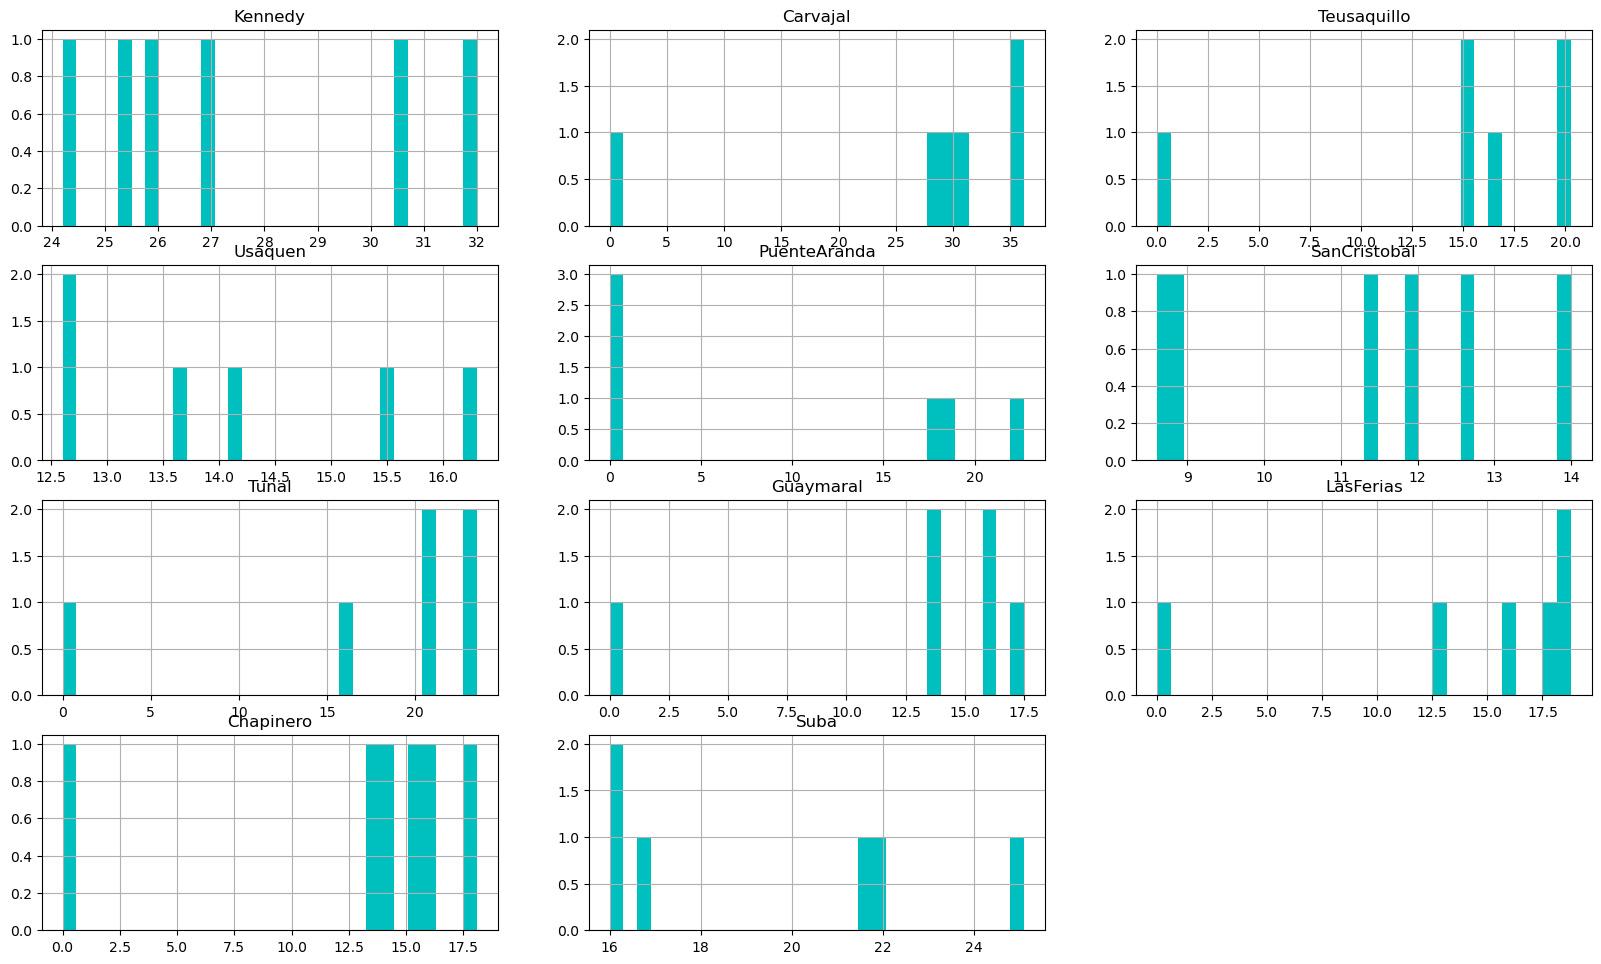

In [250]:
def histogramas(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=30,figsize=(20,30),ax=ax,color= 'c')
        ax.set_title(var_name)
    plt.show()

histogramas(data_compilado25, data_compilado25.columns, 10, 3)

**Dataset consolidado de medición de Material Particulado Inferior a 10 Micrómetros**

6 datasets en total relacionados a Concentración de Material Particulado Inferior a 10 Micrómetros {PM10} Promedio Mensual por Estación desde los años 2014 - 2019
Licencia específicada como: CC0 - Public Domain.
Link al dataset: https://datosabiertos.bogota.gov.co/dataset/concentracion-de-material-particulado-inferior-a-10-micrometros-pm10-promedio-mensual-por-estacion


In [251]:
# Reconocimeinto de los datasets de Material Particulado Inferior a 10 Micrómetros {PM10} 
data10_2014 = pd.read_csv('10 2014.csv', sep = ';')
data10_2014 = data10_2014.drop(['Fontibón - Fon'], axis=1)
data10_2015 = pd.read_csv('10 2015.csv', sep = ';')
data10_2015 = data10_2015.drop(['Fontibón - Fon'], axis=1)
data10_2016 = pd.read_csv('10 2016.csv', sep = ';')
data10_2016 = data10_2016.drop(['Fontibón - Fon'], axis=1)
data10_2017 = pd.read_csv('10 2017.csv', sep = ';')
data10_2017 = data10_2017.drop(['Fontibón - Fon'], axis=1)
data10_2018 = pd.read_csv('10 2018.csv', sep = ';')
data10_2018 = data10_2018.drop(['Fontibon - Font25\n(µg/m³)'], axis=1)
data10_2019 = pd.read_csv('10 2019.csv', sep = ';')
data10_2019 = data10_2019.drop(['Fontibon - Font25\n(µg/m³)'], axis=1)
#data10_2019.head()

In [252]:
data10_2014.set_axis(['Fecha', 'Kennedy', 'Carvajal', 'Teusaquillo' ,'Usaquen' ,'PuenteAranda' ,'SanCristobal' ,'Tunal' ,'Guaymaral' ,'LasFerias' ,'Chapinero' ,'Suba'], axis='columns', inplace=True)
data10_2015.set_axis(['Fecha', 'Kennedy', 'Carvajal', 'Teusaquillo' ,'Usaquen' ,'PuenteAranda' ,'SanCristobal' ,'Tunal' ,'Guaymaral' ,'LasFerias' ,'Chapinero' ,'Suba'], axis='columns', inplace=True)
data10_2016.set_axis(['Fecha', 'Kennedy', 'Carvajal', 'Teusaquillo' ,'Usaquen' ,'PuenteAranda' ,'SanCristobal' ,'Tunal' ,'Guaymaral' ,'LasFerias' ,'Chapinero' ,'Suba'], axis='columns', inplace=True)
data10_2017.set_axis(['Fecha', 'Kennedy', 'Carvajal', 'Teusaquillo' ,'Usaquen' ,'PuenteAranda' ,'SanCristobal' ,'Tunal' ,'Guaymaral' ,'LasFerias' ,'Chapinero' ,'Suba'], axis='columns', inplace=True)
data10_2018.set_axis(['Fecha', 'Kennedy', 'Carvajal', 'Teusaquillo' ,'Usaquen' ,'PuenteAranda' ,'SanCristobal' ,'Tunal' ,'Guaymaral' ,'LasFerias' ,'Chapinero' ,'Suba'], axis='columns', inplace=True)
data10_2019.set_axis(['Fecha', 'Kennedy', 'Carvajal', 'Teusaquillo' ,'Usaquen' ,'PuenteAranda' ,'SanCristobal' ,'Tunal' ,'Guaymaral' ,'LasFerias' ,'Chapinero' ,'Suba'], axis='columns', inplace=True)
#data10_2014

**Diccionarios de los datasets**

* Cada dataset es la medición de la Concentración de Material Particulado Inferior a 10 Micrómetros {PM10} Promedio por Estación de cada año.
* Number of Instances de cada dataset: 12
* Number of Attributes de cada dataset: 12 

Attribute Information (11 localidades de Bogotá):

1)  Fecha
2)  Kennedy
3)  Carvajal
4)  Teusaquillo
5)  Usaquen
6)  PuenteAranda
7)  SanCristobal
8)  Tunal
9)  Guaymaral
10)  LasFerias
11)  Chapinero
12)  Suba

In [253]:
mean2014 = data10_2014.mean()
mean2014.name = '2014'
mean2015 = data10_2015.mean()
mean2015.name = '2015'
mean2016 = data10_2016.mean()
mean2016.name = '2016'
mean2017 = data10_2017.mean()
mean2017.name = '2017'
mean2018 = data10_2018.mean()
mean2018.name = '2018'
mean2019 = data10_2019.mean()
mean2019.name = '2019'
#mean2014

In [254]:
data10_2014 = data10_2014.append(mean2014.transpose())
data10_2015 = data10_2015.append(mean2015.transpose())
data10_2016 = data10_2016.append(mean2016.transpose())
data10_2017 = data10_2017.append(mean2017.transpose())
data10_2018 = data10_2018.append(mean2018.transpose())
data10_2019 = data10_2019.append(mean2019.transpose())
#data10_2014

In [255]:
data_aux_2014 = data10_2014.iloc[-1:]
data_aux_2015 = data10_2015.iloc[-1:]
data_aux_2016 = data10_2016.iloc[-1:]
data_aux_2017 = data10_2017.iloc[-1:]
data_aux_2018 = data10_2018.iloc[-1:]
data_aux_2019 = data10_2019.iloc[-1:]
#data_aux_2014

In [256]:
data_compilado10 = data_aux_2014
data_compilado10 = data_compilado10.append(data_aux_2015)
data_compilado10 = data_compilado10.append(data_aux_2016)
data_compilado10 = data_compilado10.append(data_aux_2017)
data_compilado10 = data_compilado10.append(data_aux_2018)
data_compilado10 = data_compilado10.append(data_aux_2019)
#data_compilado10

In [257]:
data_compilado10 = data_compilado10.drop(['Fecha'], axis=1)
#data_compilado10

In [258]:
data_compilado10 = data_compilado10.fillna(0)
#data_compilado10

In [259]:
data_compilado10 = data_compilado10.round(1)
data_compilado10

,Kennedy,Carvajal,Teusaquillo,Usaquen,PuenteAranda,SanCristobal,Tunal,Guaymaral,LasFerias,Chapinero,Suba
2014,73.1,91.4,40.6,38.5,63.6,42.6,49.5,40.2,37.4,43.0,51.9
2015,66.2,86.2,28.2,29.8,52.0,25.5,42.8,30.8,34.4,33.7,46.7
2016,56.4,77.4,34.3,38.4,52.1,27.2,47.9,32.2,40.6,34.5,53.4
2017,48.2,59.8,31.2,36.2,41.1,26.9,39.9,28.2,36.5,27.2,42.1
2018,50.7,69.2,29.0,38.8,43.2,26.4,38.1,28.3,32.2,27.7,46.8
2019,43.8,53.5,27.2,26.1,40.0,25.0,33.7,24.8,29.1,29.7,45.6


**Diccionario del dataset compilado**

* Dataset de la medición de la Concentración de Material Particulado Inferior a 10 Micrómetros {PM10} Promedio por Estación de los años 2014 - 2019.
* Number of Instances de cada dataset: 6 (2014 - 2019)
* Number of Attributes de cada dataset: 11 (11 localidades de Bogotá) 

Attribute Information (11 localidades de Bogotá):

1)  Kennedy
2)  Carvajal
3)  Teusaquillo
4)  Usaquen
5)  PuenteAranda
6)  SanCristobal
7)  Tunal
8)  Guaymaral
9)  LasFerias
10)  Chapinero
11)  Suba

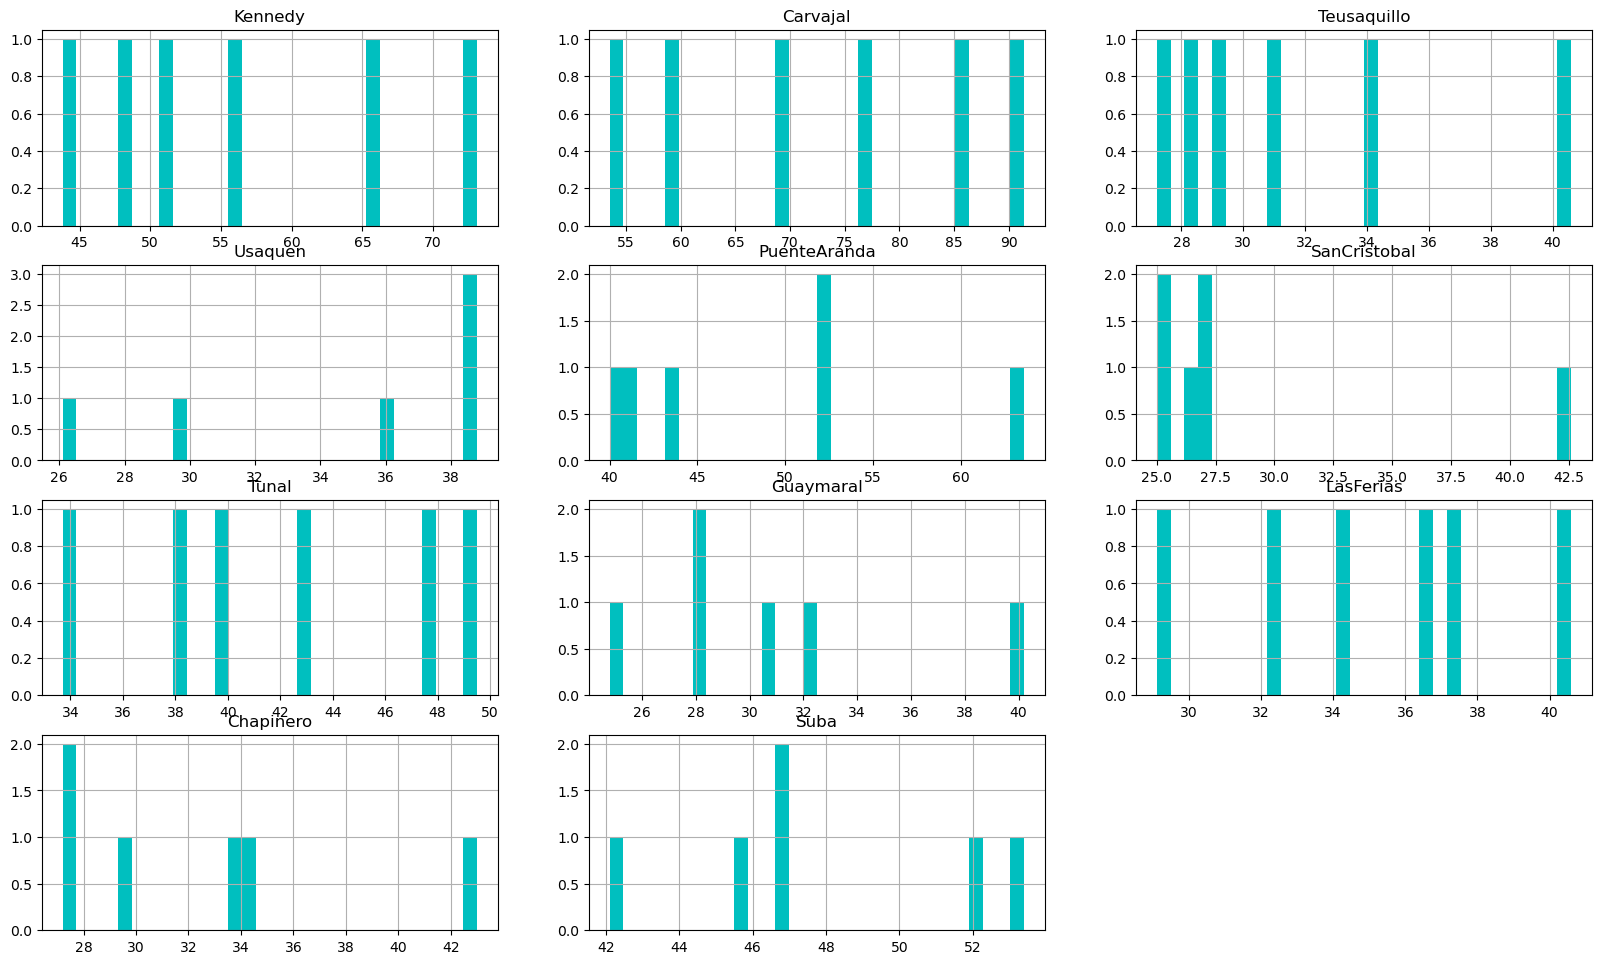

In [260]:
def histogramas(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=30,figsize=(20,30),ax=ax,color= 'c')
        ax.set_title(var_name)
    plt.show()

histogramas(data_compilado10, data_compilado10.columns, 10, 3)

**Dataset EAC Encuesta Anual de Comercio - EAC - 2019**

Dataset relacionado a Encuesta Anual de Comercio - EAC – 2019
Dirección de Metodología y Producción Estadística - DIMPE., La información de 2019 corresponde a las empresas con ingresos iguales o superiores a $1.770 Millones y/o 10 o más personas ocupadas, esto teniendo en centa que el parámetro de inclusión se actualiza cada año con el IPC.

Fuente: https://microdatos.dane.gov.co/index.php/catalog/692/study-description


In [3]:
dataEAC_2019 = pd.read_csv('EAC_2019.csv', sep = ';')
dataEAC_2019.tail()

,V1,CORRELA_16,CORRELA_9,IDOJ1,IDAIO,CIMREP,BRUTA,CONSUI,GAS,EMPAQUE,...,INVINI,INVFIN,ROTACION,INVPRO,CTO,CTOINS,VENTASNOP,GASTOS,GASTOSNOP,GASTOPNOP
9854,83777,4773,476 - 477,14,2019,0,357014,120986,27,0,...,,35234,547083,17617,547083,547083,0,689149,42471,935492
9855,83776,4711-472,471-472,14,2019,0,206412,31095,100,10564,...,274346,287879,442340,"281112,5",442340,442340,0,489035,0,710842
9856,83774,451,451,5,1980,1608578,20039191,"8335130,5",0,0,...,23610758,24359646,"120368783,067065",23985202,120368783,121977361,0,133595810,1098605,140020281
9857,83771,451,451,14,2018,132074,1919082,1263444,0,0,...,4435393,4000974,"11905810,0313106","4218183,5",11905810,12037884,0,13698914,372354,15466961
9858,83770,4711-472,471-472,14,2019,0,1073757,"670337,5",6817,128568,...,582698,3600600,5965941,2091649,5965941,5965941,0,6706754,0,7250929


**Diccionario de los dataset**

* Relevant Information: Concerns housing values in suburbs of Boston.
* Number of Instances: 9858
* Number of Attributes: 64

Attribute Information:

1) V1 - Consecutivo de identificación de la empresa

2) CORRELA_16 - Correlativa a nivel de 16 dominios de estudio según la CIIU Rev 4. A.C. Se agrega a 16 dominios por temas de reserva estadística

3) CORRELA_9 - Correlativa a nivel de 9 dominios de estudio según la CIIU Rev 4. A.C. Se agrega a 9 dominios para dar trazabilidad frente a los mismos nueve dominios departamentales

4) IDOJ1 - Organización juridica

5) IDAIO - Año de inicio operaciones

6) CIMREP - Costo de insumos en los servicios de instalacion, reparación y mantenimiento respecto a los ingresos por ventas.

7) BRUTA - Producción Bruta

8) CONSUI - Consumo Intermedio 1996 - 2006

9) GAS - Gasto en gas natural

10) EMPAQUE - Gasto en Empaques y embalajes

11) HONORA - Gasto en Honorarios y servicios técnicos

12) COMISION - Gastos de ventas por comisión a terceros

13) ARRIENDO - Gasto en Arrendamiento de bienes inmuebles y muebles

14) SEGURO - Gasto en Seguros,excepto los de prestaciones

15) ASEO - Gasto en Aseo y vigilancia

16) ENERGIA - Gasto en Energía eléctrica comprada

17) COMUNICA - Gasto en Comunicaciones

18) PUBLICO - Gasto en Otros servicios públicos

19) FLETES - Gasto en Transporte, fletes y acarreos

20) PUBLICI - Gasto en Propaganda y publicidad

21) ADECUA - Gasto en Mantenimiento, reparaciones

22) REGALA - Regalías causadas

23) OUTSOURCING - Costos y gastos por servicios contratados con terceros (outsoursing)

24) OTROS - Otros gastos inherentes a la actividad comercial

25) SUELDOS - Total Sueldos y salarios causados en el año

26) PRESTAC - Total Prestaciones sociales causadas en el año

27) VENTA - Ventas causadas en el año

28) AGREGA - Valor Agregado

29) PERREMUN - Personal remunerado

30) SOCIOS - Propietarios, socios y familiares-Total sun remuneración

31) PERSONOM - Personal permanente-Total

32) DIRECTO - Personal temporal directo-Total

33) AGENCIA - Personal temporal cont a través de agencias - Total

34) APRENDIZ - Aprendices-Total

35) TOTPERSO - Personal total

36) PROMUJ - Propietarios, socios y familiares-Mujeres

37) PROHOM - Propietarios, socios y familiares-Hombres

38) PERMUJ - Personal permanente-Mujeres

39) PERHOM - Personal permanente-Hombres

40) DIRMUJ - Personal temporal directo-Mujeres

41) DIRHOM - Personal temporal directo-Hombres

42) AGEMUJ - Personal temporal cont a través de agencias - Mujeres

43) AGEHOM - Personal temporal cont a través de agencias - Hombres

44) APRENMUJ - Aprendices-Mujeres

45) APRENHOM - Aprendices-Hombres

46) TOTMUJ - Personal total-Mujeres

47) TOTHOM - Personal total-Hombres

48) SUEPLAN - Sueldos Planta

49) PREPLAN - Prestaciones Planta

50) REMPLAN - Remuneración Planta

51) COTIZA - Cotizaciones patronales obligatorias causadas en el año

52) GASAGEN - Gastos causados por el personal temporal suministrado por agencias de empleo

53) REMTEMP - Remuneración temporal

54) TOTREM - Total Remuneracion

55) INVINI - Vlr. Existencias a dic 31/2005

56) INVFIN - Vlr. Existencias a dic 31/2006

57) ROTACION - Rotación de Inventarios

58) INVPRO - Inventario Promedio

59) CTO - Costo de mercancia vendida

60) CTOINS - Total costo de la mercancía más costo de insumos de actividades relacionadas con el comercio

61) VENTASNOP - Total de ingresos netos no operacionales

62) GASTOS - Total costos y gastos operacionales

63) GASTOSNOP - Subtotal Gastos no operacionales

64) GASTOPNOP - Total Costos y gastos operacionales y no operacionales

In [4]:
dataEAC_2019_aux = dataEAC_2019.iloc[:,[6,12,15,21,26,61,62,63]]
dataEAC_2019_aux.tail()

,BRUTA,ARRIENDO,ENERGIA,REGALA,VENTA,GASTOS,GASTOSNOP,GASTOPNOP
9854,357014,34563,2187,0,904097,689149,42471,935492
9855,206412,5000,7800,0,648752,489035,0,710842
9856,20039191,2318026,91516,0,142016552,133595810,1098605,140020281
9857,1919082,123124,17961,0,13956966,13698914,372354,15466961
9858,1073757,16108,77016,0,7039698,6706754,0,7250929


**Dataset EAI Encuesta Ambiental Industrial - EAI - 2019**

Dataset relacionado a Encuesta Ambiental Industrial - EAI – 2019
Fuente: https://microdatos.dane.gov.co/index.php/catalog/723/get-microdata


In [6]:
dataEAI_2019_1 = pd.read_csv('Capitulo II.csv', sep = ';')
dataEAI_2019_1.tail()

,CODIGO_REGISTRO,CODIGO_ACTIVIDAD,CODIGO_REGION,FACTOR_EXPANSION,C1INVR1C1A2,C1INVR1C1A3,C1INVR1T2,C1CYGR1C1G1,C1CYGR1C1G2,C1CYGR1C1G3,...,C1TIYTGENALT,C1MAEQENALT,C1CYEENALT,C1INVENALT,C1MASUMENALT,C1PEHERENALT,C1MANTEQENALT,C1MCANENALT,C1TCYGENALT,C1IYGTENALT
2986,987645,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2987,987649,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2988,987650,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2989,987651,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2990,987653,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
dataEAI_2019_1_aux = dataEAI_2019_1.iloc[:,[0,1,2,10,11,12]]
dataEAI_2019_1_aux.tail()

,CODIGO_REGISTRO,CODIGO_ACTIVIDAD,CODIGO_REGION,MCAPCOATM,C1CYGR1T2,C1IYGTOTR1C1
2986,987645,1,1,0,0,0
2987,987649,1,1,0,0,0
2988,987650,1,1,0,0,0
2989,987651,1,1,0,0,0
2990,987653,1,1,0,0,0


In [8]:
dataEAI_2019_2 = pd.read_csv('Capitulo IIA.csv', sep = ';')
#dataEAI_2019_2.tail()

In [9]:
dataEAI_2019_2_aux = dataEAI_2019_2.iloc[:,[7]]
dataEAI_2019_2_aux.tail()

,C1ACYGGA3
2986,0
2987,0
2988,26968
2989,0
2990,0


In [10]:
dataEAI_2019_3 = pd.read_csv('Capitulo III.csv', sep = ';')
#dataEAI_2019_3.tail()

In [11]:
dataEAI_2019_3_aux = dataEAI_2019_3.iloc[:,[4]]
dataEAI_2019_3_aux.tail()

,REGRESIDGEN
2986,SI
2987,NO
2988,NO
2989,SI
2990,NO


In [12]:
dataEAI_2019_4 = pd.read_csv('Capitulo IV.csv', sep = ';')
#dataEAI_2019_4.tail()

In [13]:
dataEAI_2019_4_aux = dataEAI_2019_4.iloc[:,[4]]
dataEAI_2019_4_aux.tail()

,C3RH1PR
2986,no
2987,no
2988,no
2989,no
2990,si


In [14]:
dataEAI_2019_5 = pd.read_csv('Capitulo V.csv', sep = ';')
#dataEAI_2019_5.tail()

In [15]:
dataEAI_2019_5_aux = dataEAI_2019_5.iloc[:,[4]]
dataEAI_2019_5_aux.tail()

,FILTCERTECOCAPV
2986,no
2987,no
2988,no
2989,no
2990,no


In [16]:
dataEAI_2019_merged = pd.concat([dataEAI_2019_1_aux, dataEAI_2019_2_aux, dataEAI_2019_3_aux, dataEAI_2019_4_aux, dataEAI_2019_5_aux], axis=1, join="inner")
dataEAI_2019_merged.tail()

,CODIGO_REGISTRO,CODIGO_ACTIVIDAD,CODIGO_REGION,MCAPCOATM,C1CYGR1T2,C1IYGTOTR1C1,C1ACYGGA3,REGRESIDGEN,C3RH1PR,FILTCERTECOCAPV
2986,987645,1,1,0,0,0,0,SI,no,no
2987,987649,1,1,0,0,0,0,NO,no,no
2988,987650,1,1,0,0,0,26968,NO,no,no
2989,987651,1,1,0,0,0,0,SI,no,no
2990,987653,1,1,0,0,0,0,NO,si,no


In [17]:
dataEAI_2019_merged.set_axis(['Cod', 'Actividad', 'Region', 'MedicionAtmo' ,'CostoPrev' ,'InversionPrev' ,'PagoEmisionesAtmo' ,'MideResiduos' ,'ProgAhorroAgua' ,'CertAmbiental'], axis='columns', inplace=True)
#dataEAI_2019_merged.tail()

In [18]:
dataEAI_2019 = dataEAI_2019_merged[dataEAI_2019_merged['Region'] == 5]
dataEAI_2019 = dataEAI_2019.drop(['Region'], axis=1)
dataEAI_2019.tail()

,Cod,Actividad,MedicionAtmo,CostoPrev,InversionPrev,PagoEmisionesAtmo,MideResiduos,ProgAhorroAgua,CertAmbiental
2879,986589,1,0,31270,31270,0,SI,si,si
2880,986601,1,1022,1612,1612,1022,SI,no,no
2882,986617,1,0,0,0,0,SI,no,si
2883,986618,1,0,44628,44628,0,SI,si,si
2884,986620,9,0,0,0,0,NO,no,no


**Diccionario de los dataset**

* Relevant Information: Indicadores de actividades de prevención y control de tema medioambiental.
* Number of Instances: 2884
* Number of Attributes: 10

Attribute Information:

**1) Cod :** Codigo unico de indentificación de las fuentes anonimizado.

**2) Actividad:** Codigo de los grupos de divisiones industriales (1 Alimentos, bebidas y tabaco, 2 Coquizacion, fabricacion de productos de la refinacion de petroleo y combustible nuclear, 3 Fabricacion de productos de caucho y plastico, 4 Fabricacion de productos y sustancias quimicas, 5 Industria de la madera y el corcho, facricacion de papel y actividades de edición e impresion, 6 Industria de productos minerales no metalicos, 7 Metalurgia y fabricacion de productos metalicos, 8 Textiles, confeccion, calzado y pieles, 9 Otras divisiones industriales)

**3) MedicionAtmo:** Medición, control y análisis para la prevención de la contaminación atmosférica

**4) CostoPrev:** Total costos y gastos para la prevención de la contaminación atmosférica

**5) InversionPrev:** Total inversión y gastos para la prevención de la contaminación atmosférica

**6) PagoEmisionesAtmo:** Pago por permisos de emisiones atmosféricas

**7) MideResiduos:** ¿El establecimiento cuenta con un instrumento de medición de residuos que genera?

**8) ProgAhorroAgua:** ¿El Establecimiento cuenta con un programa para uso eficiente y ahorro de agua?

**9) CertAmbiental:** ¿El establecimiento cuenta con alguna certificación ambiental o ecoetiquetado, o lo esta implementando?


**Exportación de los datasets compilados de Material Particulado 2.5 y 10 nano particulas**

In [276]:
data_compilado25.to_csv('data_compilado25.csv')
data_compilado10.to_csv('data_compilado10.csv')

**Exportación de los datasets compilados de EAC Encuesta Anual 2019 de Comercio y EAI Encuesta Ambiental Industrial 2019**

In [19]:
dataEAC_2019_aux.to_csv('dataEAC_2019.csv')
dataEAI_2019.to_csv('dataEAI_2019.csv')